# Compare

Compare WSRA, SWIFT, and Wave Glider wave measurements during ATOMIC.

In [42]:
import glob
import re
from datetime import datetime

import cartopy
import cmocean
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywsra
import scipy
import xarray as xr
from IPython import get_ipython
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from sharedfunctions import configure_figures, read_stored_variable

## Setup

Read stored variables from `io.pynb` and `calculate.ipnyb`.  Configure matplotlib figures using shared parameters.

In [43]:
%run 'calculate.ipynb'
%run -i sharedfunctions.py
atomic_wsra = read_stored_variable('atomic_wsra')
atomic_swifts = read_stored_variable('atomic_swifts')
atomic_wave_gliders = read_stored_variable('atomic_wave_gliders')
matches_df = read_stored_variable('matches_df')

configure_figures()

## Overview

### WSRA flight path

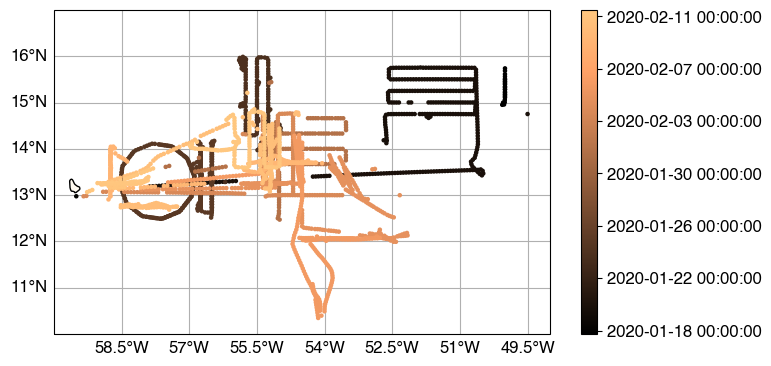

In [ ]:
PROJECTION = cartopy.crs.PlateCarree()
IMAGE_RESOLUTION = 400

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection=PROJECTION)

atomic_wsra.wsra.chart.ocean_color = 'white'
atomic_wsra.wsra.chart.land_color = 'floralwhite'

ax = atomic_wsra.wsra.plot(
    ax=ax,
    extent=(-60, -49, 10, 17),
    plot_best_track=False,
    column='timestamp',
    cmap='copper',
    label='WSRA',
    legend=True,
    legend_kwds={
     'shrink': 0.7,
    }
)
cax = ax.get_figure().axes[-1]
date_ticks = pd.date_range(start=atomic_wsra['time'][0].dt.ceil('D').values,
                           end=atomic_wsra['time'][-1].dt.floor('D').values,
                           freq='4D')
_ = cax.set_yticks(pd.to_numeric(date_ticks), labels=date_ticks)

# plt.savefig('wsra_hurricane_earl_time_tracks.png', dpi=IMAGE_RESOLUTION)

### WSRA flight metadata

Plot the WSRA flight metadata (altitude, roll, and ground speed).

<GeoAxes: >

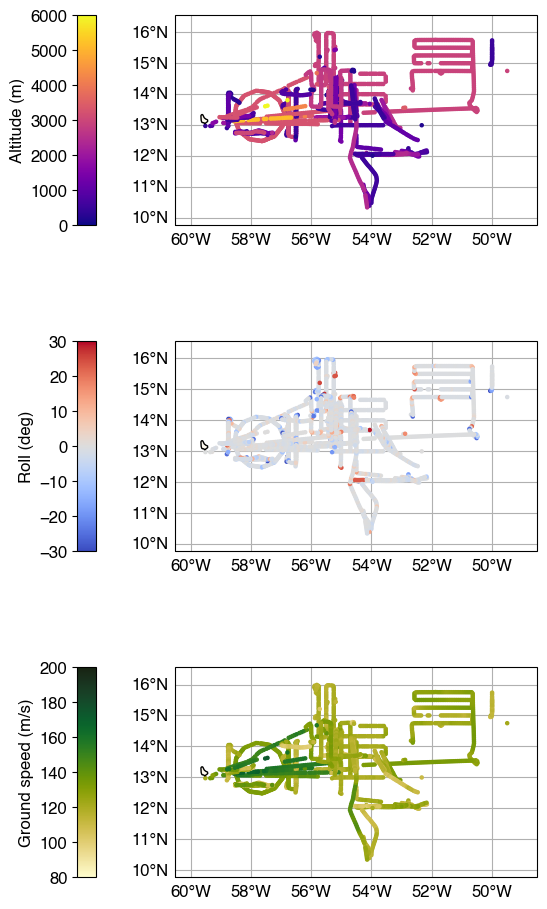

In [ ]:
PROJECTION = cartopy.crs.PlateCarree()
IMAGE_RESOLUTION = 400

fig = plt.figure(figsize=(6, 12))

# Plot altitude
ax = fig.add_subplot(3, 1, 1, projection=PROJECTION)
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="5%", axes_class=mpl.axes.Axes)
cmap = mpl.cm.plasma  # cmocean.cm.deep_r
norm = mpl.colors.Normalize(vmin=0, vmax=6000)
atomic_wsra.wsra.plot(
    column='platform_radar_altitude',  # 'ymd'
    plot_best_track=False,
    legend=True,
    cmap=cmap,
    norm=norm,
    ax=ax,
    cax=cax,
    legend_kwds={
        "label": "Altitude (m)",
        "orientation": "vertical",
        "location": "left",
    }
)

# Plot roll
ax = fig.add_subplot(3, 1, 2, projection=PROJECTION)
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="5%", axes_class=mpl.axes.Axes)
cmap = mpl.cm.coolwarm
norm = mpl.colors.CenteredNorm(halfrange=30)
atomic_wsra.wsra.plot(
    column='wsra_computed_roll',  # 'ymd'
    plot_best_track=False,
    legend=True,
    cmap=cmap,
    norm=norm,
    ax=ax,
    cax=cax,
    legend_kwds={
        "label": "Roll (deg)",
        "orientation": "vertical",
        "location": "left",
    }
)

# Plot ground speed
ax = fig.add_subplot(3, 1, 3, projection=PROJECTION)
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="5%", axes_class=mpl.axes.Axes)
cmap = cmocean.cm.speed
norm = mpl.colors.Normalize(vmin=80, vmax=200)
atomic_wsra.wsra.plot(
    column='platform_speed_wrt_ground',  # 'ymd'
    plot_best_track=False,
    legend=True,
    cmap=cmap,
    norm=norm,
    ax=ax,
    cax=cax,
    legend_kwds={
        "label": "Ground speed (m/s)",
        "orientation": "vertical",
        "location": "left",
    }
)

# fig.savefig(f'WSRA_flight_parameters.{IMAGE_FILE_TYPE}',
#             format=IMAGE_FILE_TYPE,
#             dpi=IMAGE_RESOLUTION)

### WSRA masking
Create a trajectory mask and overwrite the original data.  Use the limits specified in Pincus et al. (2021).

In [ ]:
atomic_wsra.wsra.create_trajectory_mask(altitude_limits=(500, 4000),
                                        roll_limit=3)
atomic_wsra = atomic_wsra.wsra.mask()

Re-plot the masked trajectory

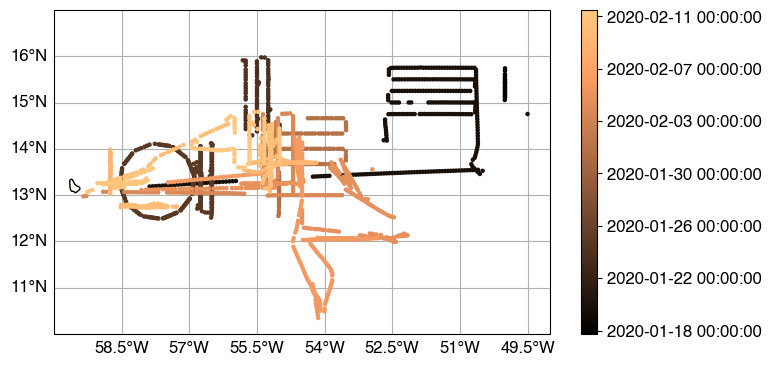

In [ ]:
PROJECTION = cartopy.crs.PlateCarree()
IMAGE_RESOLUTION = 400

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection=PROJECTION)

atomic_wsra.wsra.chart.ocean_color = 'white'
atomic_wsra.wsra.chart.land_color = 'floralwhite'

ax = atomic_wsra.wsra.plot(
    ax=ax,
    extent=(-60, -49, 10, 17),
    plot_best_track=False,
    column='timestamp',
    cmap='copper',
    label='WSRA',
    legend=True,
    legend_kwds={
     'shrink': 0.7,
    }
)
cax = ax.get_figure().axes[-1]
date_ticks = pd.date_range(start=atomic_wsra['time'][0].dt.ceil('D').values,
                           end=atomic_wsra['time'][-1].dt.floor('D').values,
                           freq='4D')
_ = cax.set_yticks(pd.to_numeric(date_ticks), labels=date_ticks)

# fig.savefig(f'WSRA_flight_path_masked.{IMAGE_FILE_TYPE}',
#             format=IMAGE_FILE_TYPE,
#             dpi=IMAGE_RESOLUTION)


### WSRA, SWIFT, and Wave Glider paths

Text(0.5, 1.0, 'ATOMIC WSRA flight path and SWIFT/Wave Glider drift tracks')

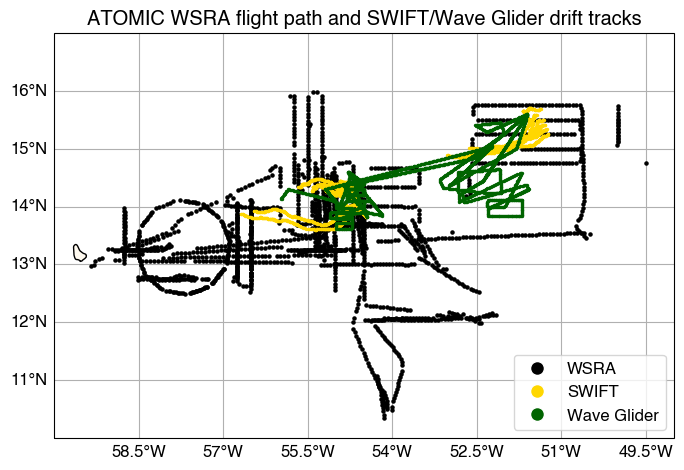

In [ ]:
PROJECTION = cartopy.crs.PlateCarree()
IMAGE_RESOLUTION = 400

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection=PROJECTION)

atomic_wsra.wsra.chart.ocean_color = 'white'
atomic_wsra.wsra.chart.land_color = 'floralwhite'

atomic_wsra.wsra.plot(
    plot_best_track=False,
    extent=(-60, -49, 10, 17),
    ax=ax,
    label='WSRA'
)

for swift_id, swift_ds in atomic_swifts.items():
    ax.scatter(
        swift_ds['lon'],
        swift_ds['lat'],
        # c=swift_ds['ymd'].values,
        color='gold',
        s=2,
        label='SWIFT'
    )

for wave_glider_id, wave_glider_ds in atomic_wave_gliders.items():
    ax.scatter(
        wave_glider_ds['lon'],
        wave_glider_ds['lat'],
        s=2,
        color='darkgreen',
        label='Wave glider'
    )

legend_elements = [Line2D([0], [0], marker='o', color='w', label='WSRA',
                        markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='SWIFT',
                        markerfacecolor='gold', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Wave Glider',
                        markerfacecolor='darkgreen', markersize=10)]

ax.legend(handles=legend_elements, loc='lower right')
ax.set_title('ATOMIC WSRA flight path and SWIFT/Wave Glider drift tracks')

# fig.savefig(f'ATOMIC_flight_and_drift_tracks.{IMAGE_FILE_TYPE}',
#             format=IMAGE_FILE_TYPE,
#             dpi=IMAGE_RESOLUTION)

## Colocation

In [ ]:
def plot_swift(ax, swift_ds, var, **scatter_kwargs):
    ax.scatter(
        swift_ds['lon'],
        swift_ds['lat'],
        c=swift_ds[var],
        **scatter_kwargs
)

def plot_wsra(ax, cax, wsra_ds, var, **plot_kwargs):
    wsra_ds.wsra.plot(
        ax=ax,
        cax=cax,
        column=var,
        **plot_kwargs
    )


def comparison_plot(ax, wsra_ds, swift_ds, c_array, wsra_var, swift_var, **scatter_kwargs):
    #TODO: color by prox using c?
    ax.scatter(
        wsra_ds[wsra_var],
        swift_ds[swift_var],
        c=c_array,
        **scatter_kwargs
    )


def create_figure():
    fig = plt.figure(figsize=(12, 6))
    gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[2.5, 1], wspace = .35)
    ax1 = fig.add_subplot(gs[0], projection=PROJECTION)
    ax2 = fig.add_subplot(gs[1])

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", axes_class=mpl.axes.Axes, pad="2%")

    return fig, ax1, ax2, cax

IndexError: index 152 is out of bounds for axis 0 with size 118

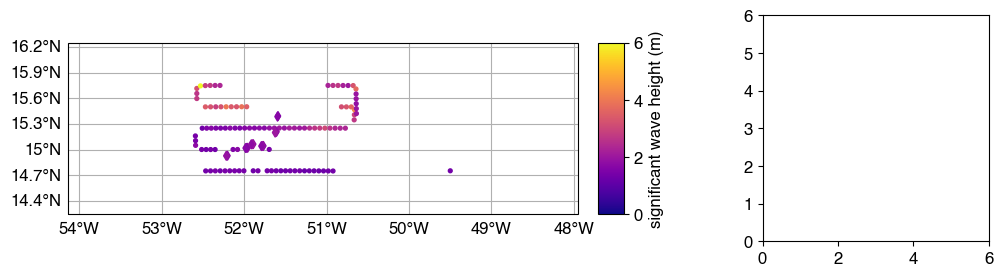

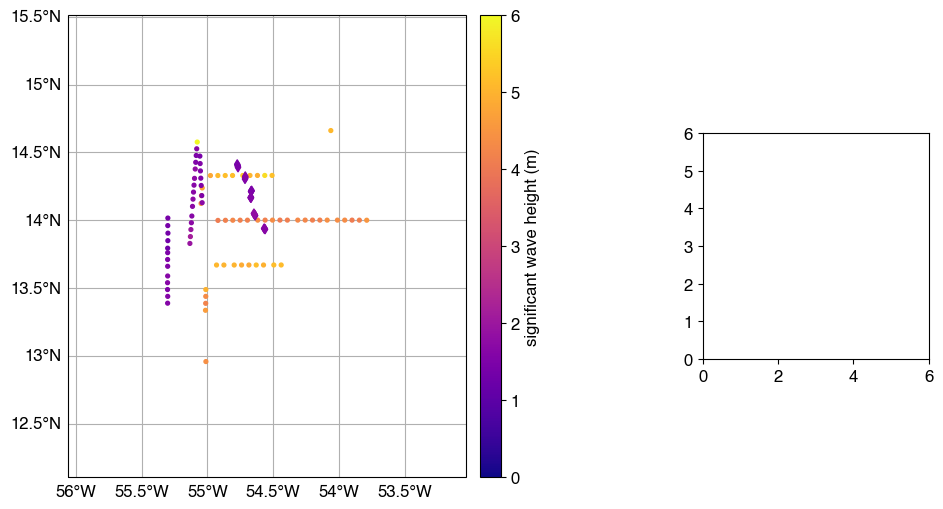

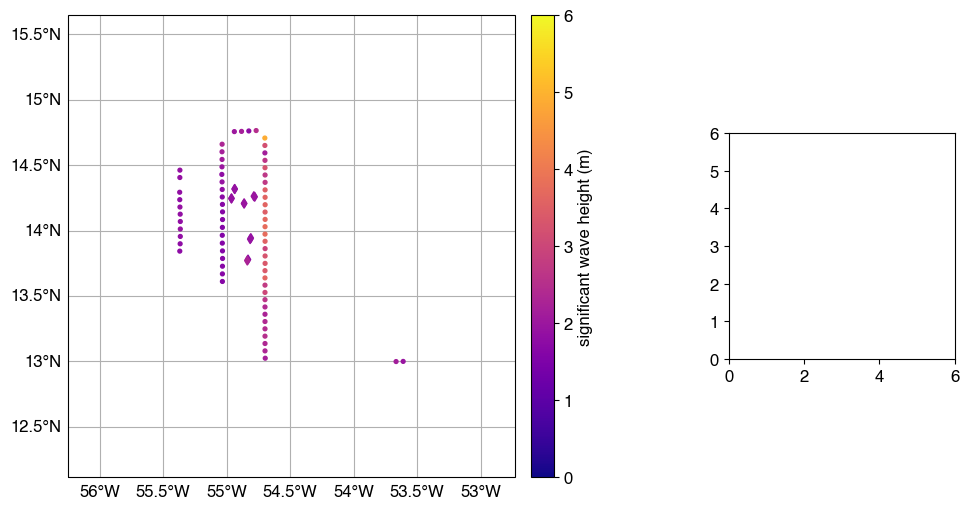

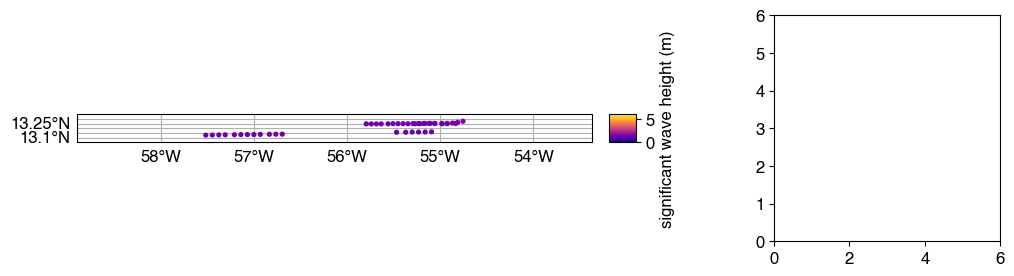

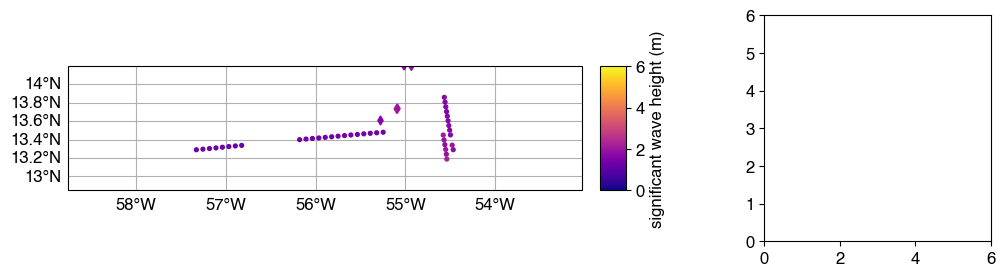

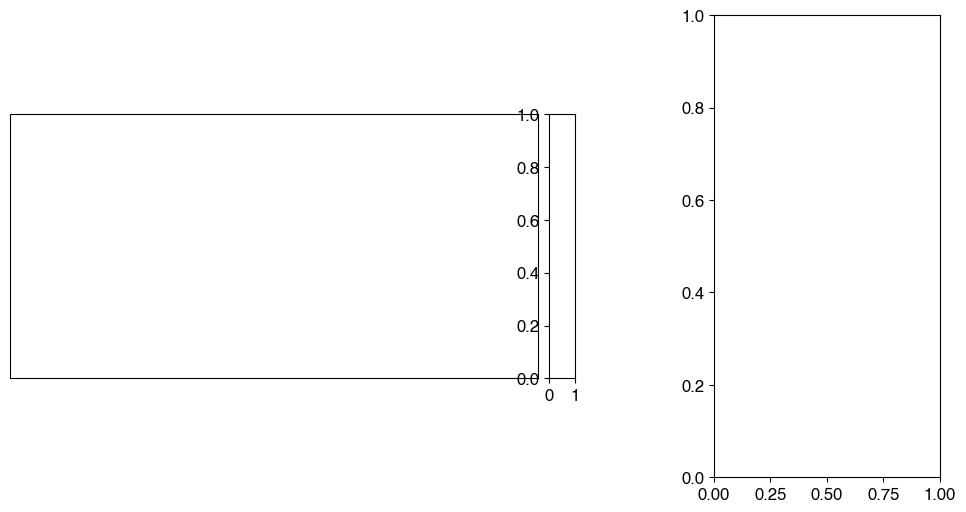

In [ ]:
wsra_var='sea_surface_wave_significant_height'
swift_var='sea_surface_wave_significant_height'
cmap=mpl.cm.plasma
norm=mpl.colors.Normalize(vmin=0, vmax=6)

PROJECTION = cartopy.crs.PlateCarree()
IMAGE_RESOLUTION = 300
SWIFT_SCATTER_KWARGS = dict(
    s=20,
    marker='d',
    label='SWIFT',
    cmap=cmap,
    norm=norm,
)
WSRA_PLOT_KWARGS = dict(
    legend=True,
    marker='.',
    markersize=30,
    label='WSRA',
    plot_best_track=False,
    cmap=cmap,
    norm=norm,
    legend_kwds={
        "orientation": "vertical",
        "location": "right",
    }
)

mission_dates = np.unique(atomic_wsra['day'].dropna(dim='time'))

for date in mission_dates:

    unique_wsra_indices = np.unique(np.concatenate(matches_df.loc[date]['wsra_indices'].to_numpy()))

    if unique_wsra_indices.size > 0:

        hs_fig, hs_ax1, hs_ax2, hs_cax = create_figure()

        wsra_in_mission = atomic_wsra.where(atomic_wsra['day'] == date, drop=True)
        wsra_matches_unique = wsra_in_mission.isel(time=unique_wsra_indices)
        wsra_matches_unique.wsra.chart.ocean_color = 'white' # 'whitesmoke'
        wsra_matches_unique.wsra.chart.land_color = 'floralwhite'  # white, whitesmoke
        wsra_matches_unique.wsra.chart.buffer_percent=0.5
        plot_wsra(hs_ax1, hs_cax, wsra_matches_unique, wsra_var, **WSRA_PLOT_KWARGS)

        for swift_id in atomic_swifts.keys():
            swift_in_mission = atomic_swifts[swift_id].where(atomic_swifts[swift_id]['day'] == date)

            wsra_indices = matches_df.loc[date].loc[swift_id]['wsra_indices']
            swift_indices = matches_df.loc[date].loc[swift_id]['swift_indices']
            wsra_matches = wsra_in_mission.isel(time=wsra_indices)
            swift_matches = swift_in_mission.isel(time=swift_indices)
            swift_matches_unique = swift_in_mission.isel(time=np.unique(swift_indices))
            plot_swift(hs_ax1, swift_matches_unique, swift_var, **SWIFT_SCATTER_KWARGS)
            # comparison_plot(hs_ax2, wsra_matches, swift_matches,
            #                 matches_df.loc[date].loc[swift_id]['distance'],
            #                 wsra_var, swift_var,  s=5)

        hs_cax.set_ylabel('significant wave height (m)')
        hs_ax2.set_aspect('equal')
        hs_ax2.set_ylim([0, 6])
        hs_ax2.set_xlim([0, 6])

